In [ ]:
!wget -O "dataset.zip" "https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded"

--2025-10-16 14:24:07--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2025-10-16 14:24:08--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.40.144, 3.5.67.2, 52.92.3.66, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.40.144|:443... 

In [ ]:
!unzip /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1326).JPG  
  infl

In [ ]:
!ls /content/

dataset.zip  Plant_leave_diseases_dataset_with_augmentation  sample_data


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/Plant_leave_diseases_dataset_with_augmentation', output="dataset", seed=1337, ratio=(.8, .1,.1))

Copying files: 61486 files [00:18, 3259.40 files/s]


## **Data Preprocessing**

In [ ]:
train_dir = "/content/dataset/train"
validation_dir = "/content/dataset/val"

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 49179 files belonging to 39 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
test_dir = "/content/dataset/test"
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 6139 files belonging to 39 classes.
Found 6168 files belonging to 39 classes.


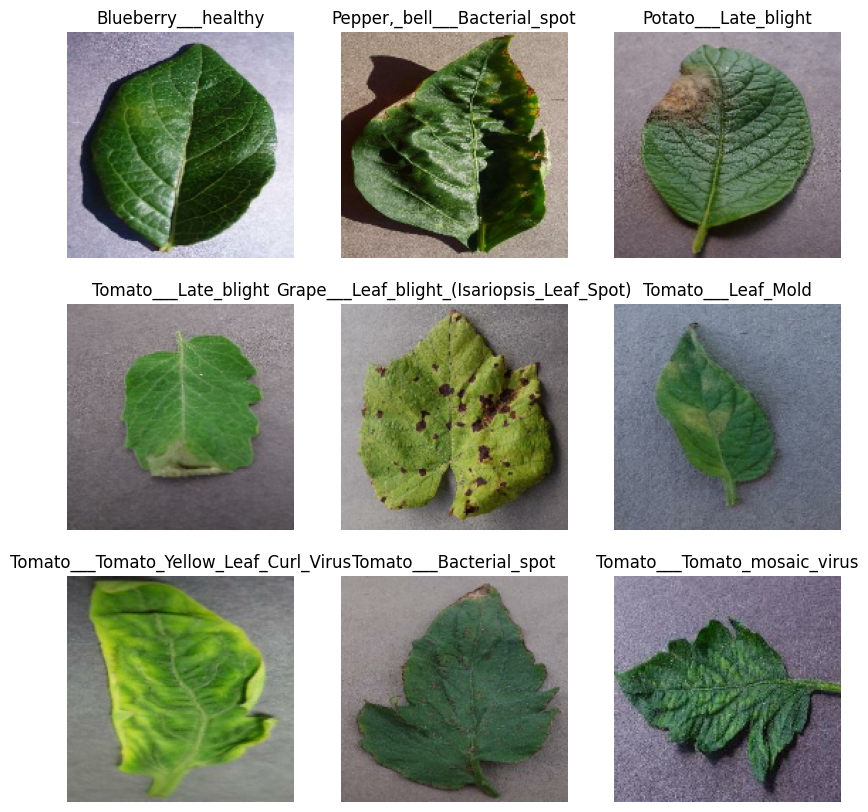

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import splitfolders
splitfolders.ratio('/content/Plant_leave_diseases_dataset_with_augmentation', output="dataset_new", seed=1337, ratio=(.8, .1,.1))

base_data_directory = 'dataset_new/train'

try:
    class_names = sorted(os.listdir(base_data_directory))

    class_names = [name for name in class_names if not name.startswith('.')]

    class_indices = {str(i): name for i, name in enumerate(class_names)}

    print(f" Found {len(class_names)} class labels.")

except FileNotFoundError:
    print(f" ERROR: Could not find the split data folders at {base_data_directory}. Please check the folder name.")
    raise

LABELS_SAVE_PATH = "/content/drive/MyDrive/class_indices.json"

print(f"Saving class indices to: {LABELS_SAVE_PATH}")
with open(LABELS_SAVE_PATH, "w") as f:
    json.dump(class_indices, f, indent=4)

print(" class_indices.json saved successfully to Google Drive!")

Copying files: 61486 files [00:08, 7138.00 files/s]


✅ Found 39 class labels.
Saving class indices to: /content/drive/MyDrive/class_indices.json
✅ class_indices.json saved successfully to Google Drive!


## **Create the base model from the pre-trained convnets**

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetB4(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet',
)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1792)


## **Feature extraction**
**Freeze the convolutional base**

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "efficientnetb4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 160, 160,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 160, 160,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 160, 160,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 161, 161,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 80, 80,    │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 80, 80,    │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 80, 80,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 80, 80,    │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 80, 80,    │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 80, 80,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 80, 80,    │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 80, 80,    │      1,152 │ block1a_se_excit

 Total params: 17,673,823 (67.42 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17,673,823 (67.42 MB)

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1792)


In [ ]:
prediction_layer = tf.keras.layers.Dense(len(class_names), activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 39)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 5, 5, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │        69,927 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,743,750 (67.69 MB)

 Trainable params: 69,927 (273.15 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

In [ ]:
len(model.trainable_variables)

2

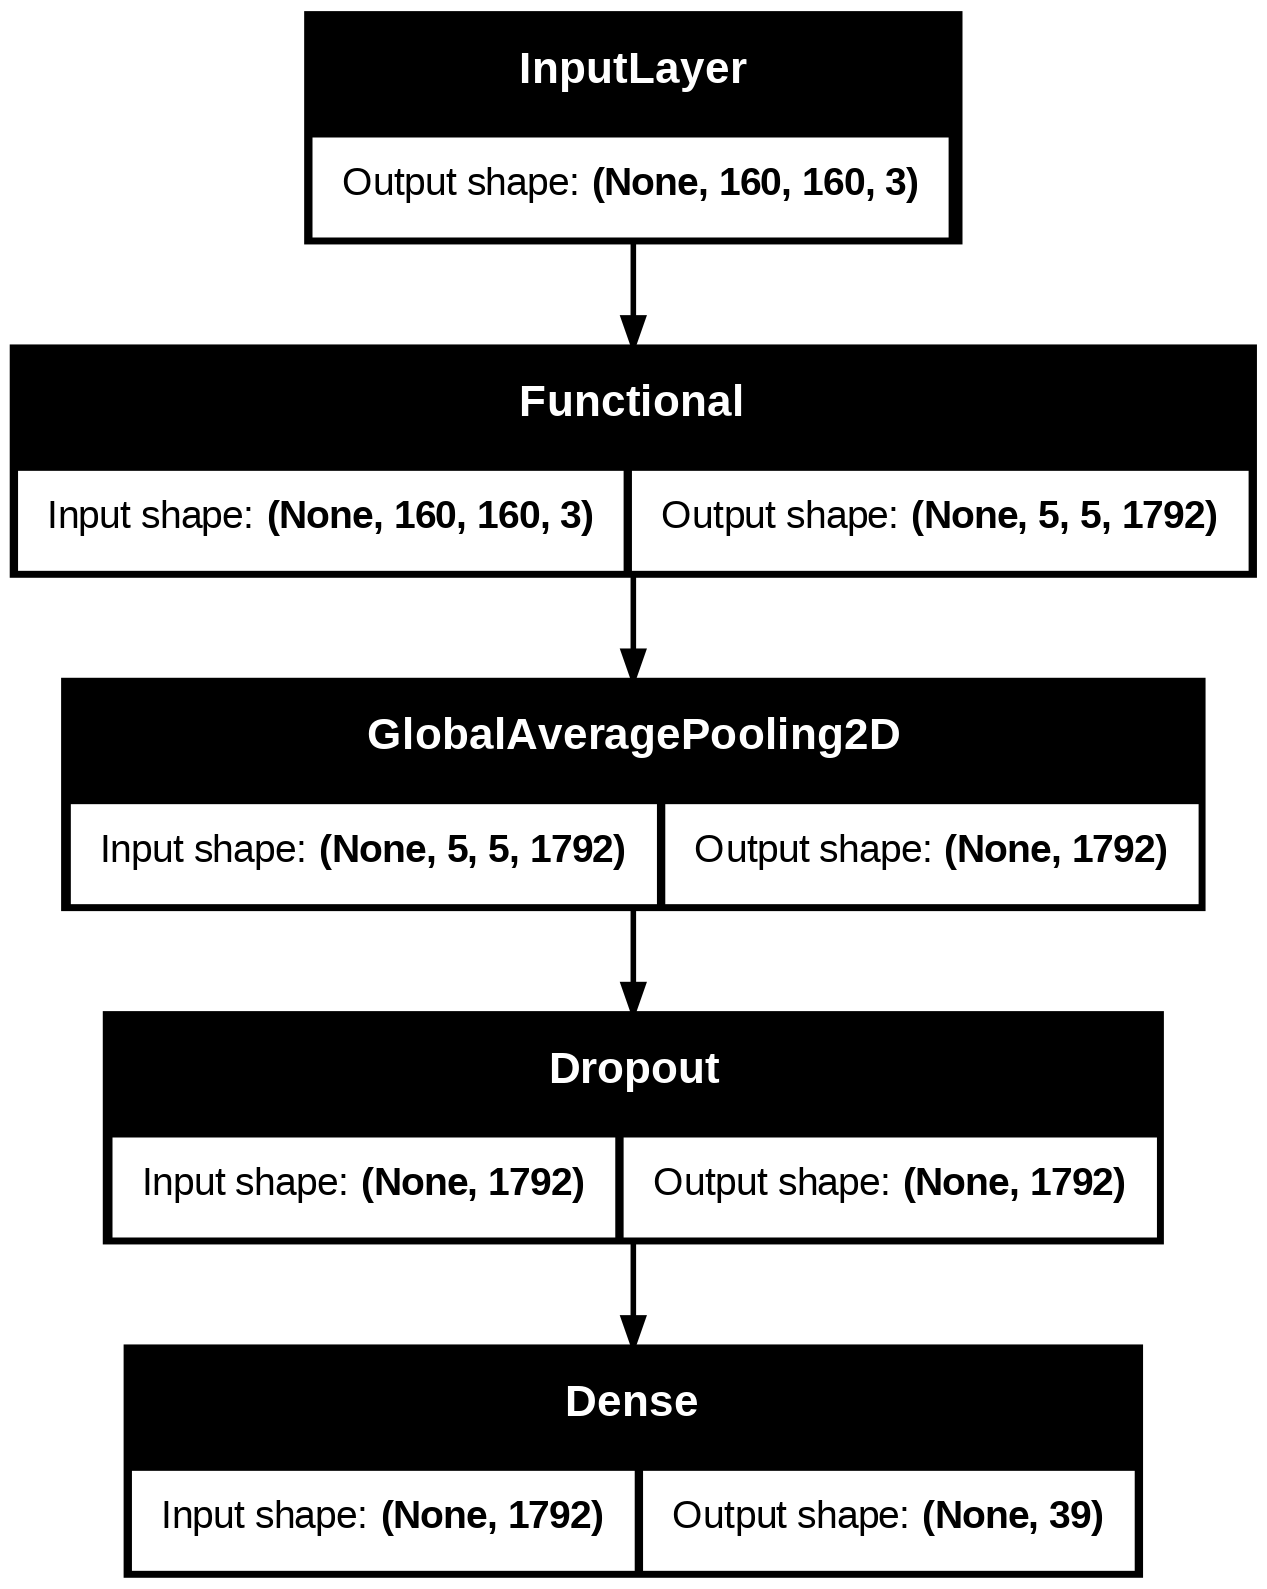

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
initial_epochs = 6
loss0, accuracy0 = model.evaluate(validation_dataset)

192/192 ━━━━━━━━━━━━━━━━━━━━ 51s 134ms/step - accuracy: 0.0306 - loss: 3.7433


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.74
initial accuracy: 0.03


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/6
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 157s 75ms/step - accuracy: 0.7090 - loss: 1.1834 - val_accuracy: 0.9072 - val_loss: 0.3239
Epoch 2/6
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 92s 60ms/step - accuracy: 0.9042 - loss: 0.3432 - val_accuracy: 0.9335 - val_loss: 0.2314
Epoch 3/6
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 95s 62ms/step - accuracy: 0.9217 - loss: 0.2632 - val_accuracy: 0.9392 - val_loss: 0.1938
Epoch 4/6
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.9321 - loss: 0.2275 - val_accuracy: 0.9489 - val_loss: 0.1645
Epoch 5/6
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.9358 - loss: 0.2087 - val_accuracy: 0.9471 - val_loss: 0.1562
Epoch 6/6
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 96s 63ms/step - accuracy: 0.9407 - loss: 0.1924 - val_accuracy: 0.9516 - val_loss: 0.1497


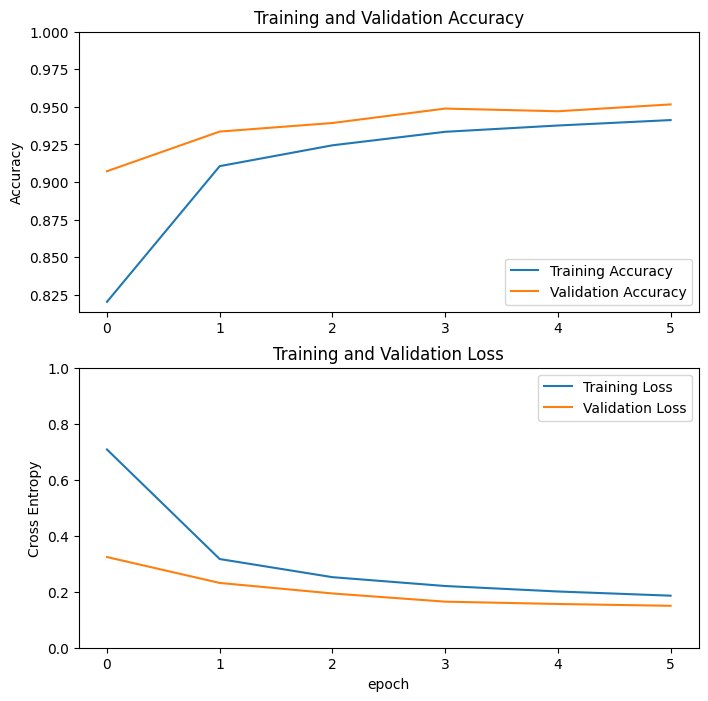

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **Fine tuning**

In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  475


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 5, 5, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39)             │        69,927 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,743,750 (67.69 MB)

 Trainable params: 17,531,783 (66.88 MB)

 Non-trainable params: 211,967 (828.00 KB)

In [ ]:
len(model.trainable_variables)

333

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=validation_dataset)

Epoch 7/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 441s 208ms/step - accuracy: 0.6305 - loss: 1.5433 - val_accuracy: 0.9013 - val_loss: 0.3050
Epoch 8/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 239s 156ms/step - accuracy: 0.8963 - loss: 0.3387 - val_accuracy: 0.9484 - val_loss: 0.1559
Epoch 9/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 239s 156ms/step - accuracy: 0.9432 - loss: 0.1776 - val_accuracy: 0.9666 - val_loss: 0.0992
Epoch 10/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 239s 156ms/step - accuracy: 0.9632 - loss: 0.1116 - val_accuracy: 0.9772 - val_loss: 0.0715
Epoch 11/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 239s 155ms/step - accuracy: 0.9769 - loss: 0.0707 - val_accuracy: 0.9821 - val_loss: 0.0546
Epoch 12/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 239s 155ms/step - accuracy: 0.9831 - loss: 0.0489 - val_accuracy: 0.9844 - val_loss: 0.0476
Epoch 13/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 264s 156ms/step - accuracy: 0.9888 - loss: 0.0344 - val_accuracy: 0.9879 - val_loss: 0.0403
Epoch 14/16
1537/1537 ━━━━━━━━━━━━━━━━━━━━ 242s 158ms/step

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

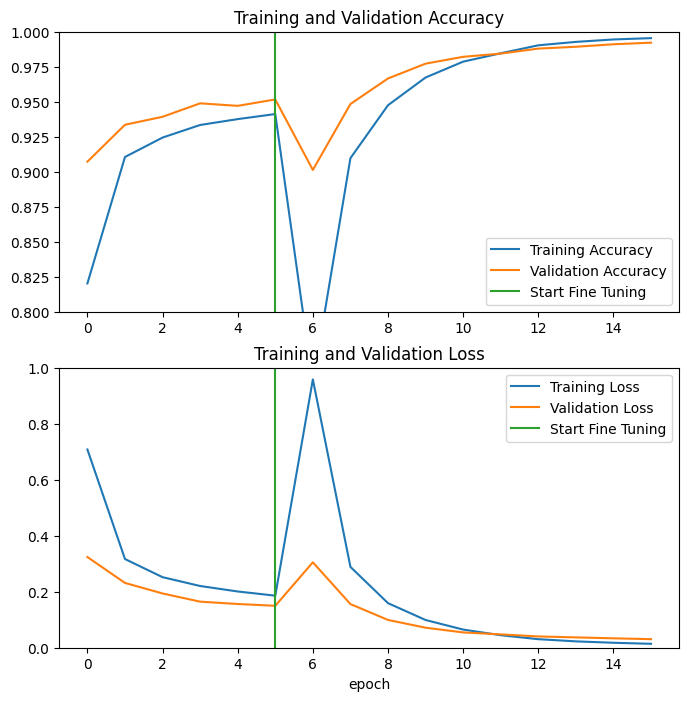

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

193/193 ━━━━━━━━━━━━━━━━━━━━ 26s 137ms/step - accuracy: 0.9914 - loss: 0.0294
Test accuracy : 0.9918936491012573


Predictions:
 [ 8 36 25  5 26 17 25 16 34  9 35 13 36 25 28 29 20  5 38 36 24 36  1  5
 22 25 16 36 37 36  9 18]
Labels:
 [ 8 36 25  5 26 17 25 16 34  9 35 13 36 25 28 29 20  5 38 36 24 36  1  5
 22 25 16 36 37 36  9 18]


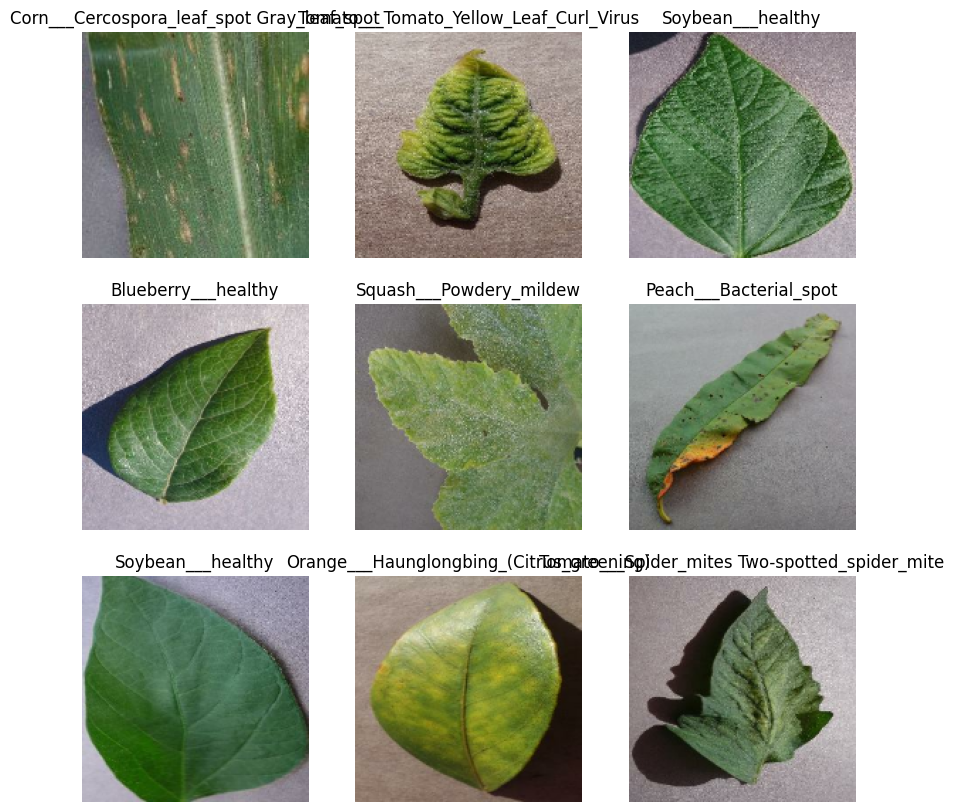

In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
predictions = tf.argmax(predictions,axis=1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
print("Final layer activation:", model.layers[-1].activation)

Final layer activation: <function softmax at 0x7e0b2a18df80>


## **Saving Model**

In [ ]:
model.save("plant_disease_recog_model_pwp.keras")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
model.save("/content/drive/MyDrive/plant_disease_recog_model_pwp.keras")

In [ ]:
import os

print("Checking if /content/dataset exists:", os.path.exists("/content/dataset"))


Checking if /content/dataset exists: True


✅ Using test directory: /content/dataset/test
Found 6168 files belonging to 39 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/ste

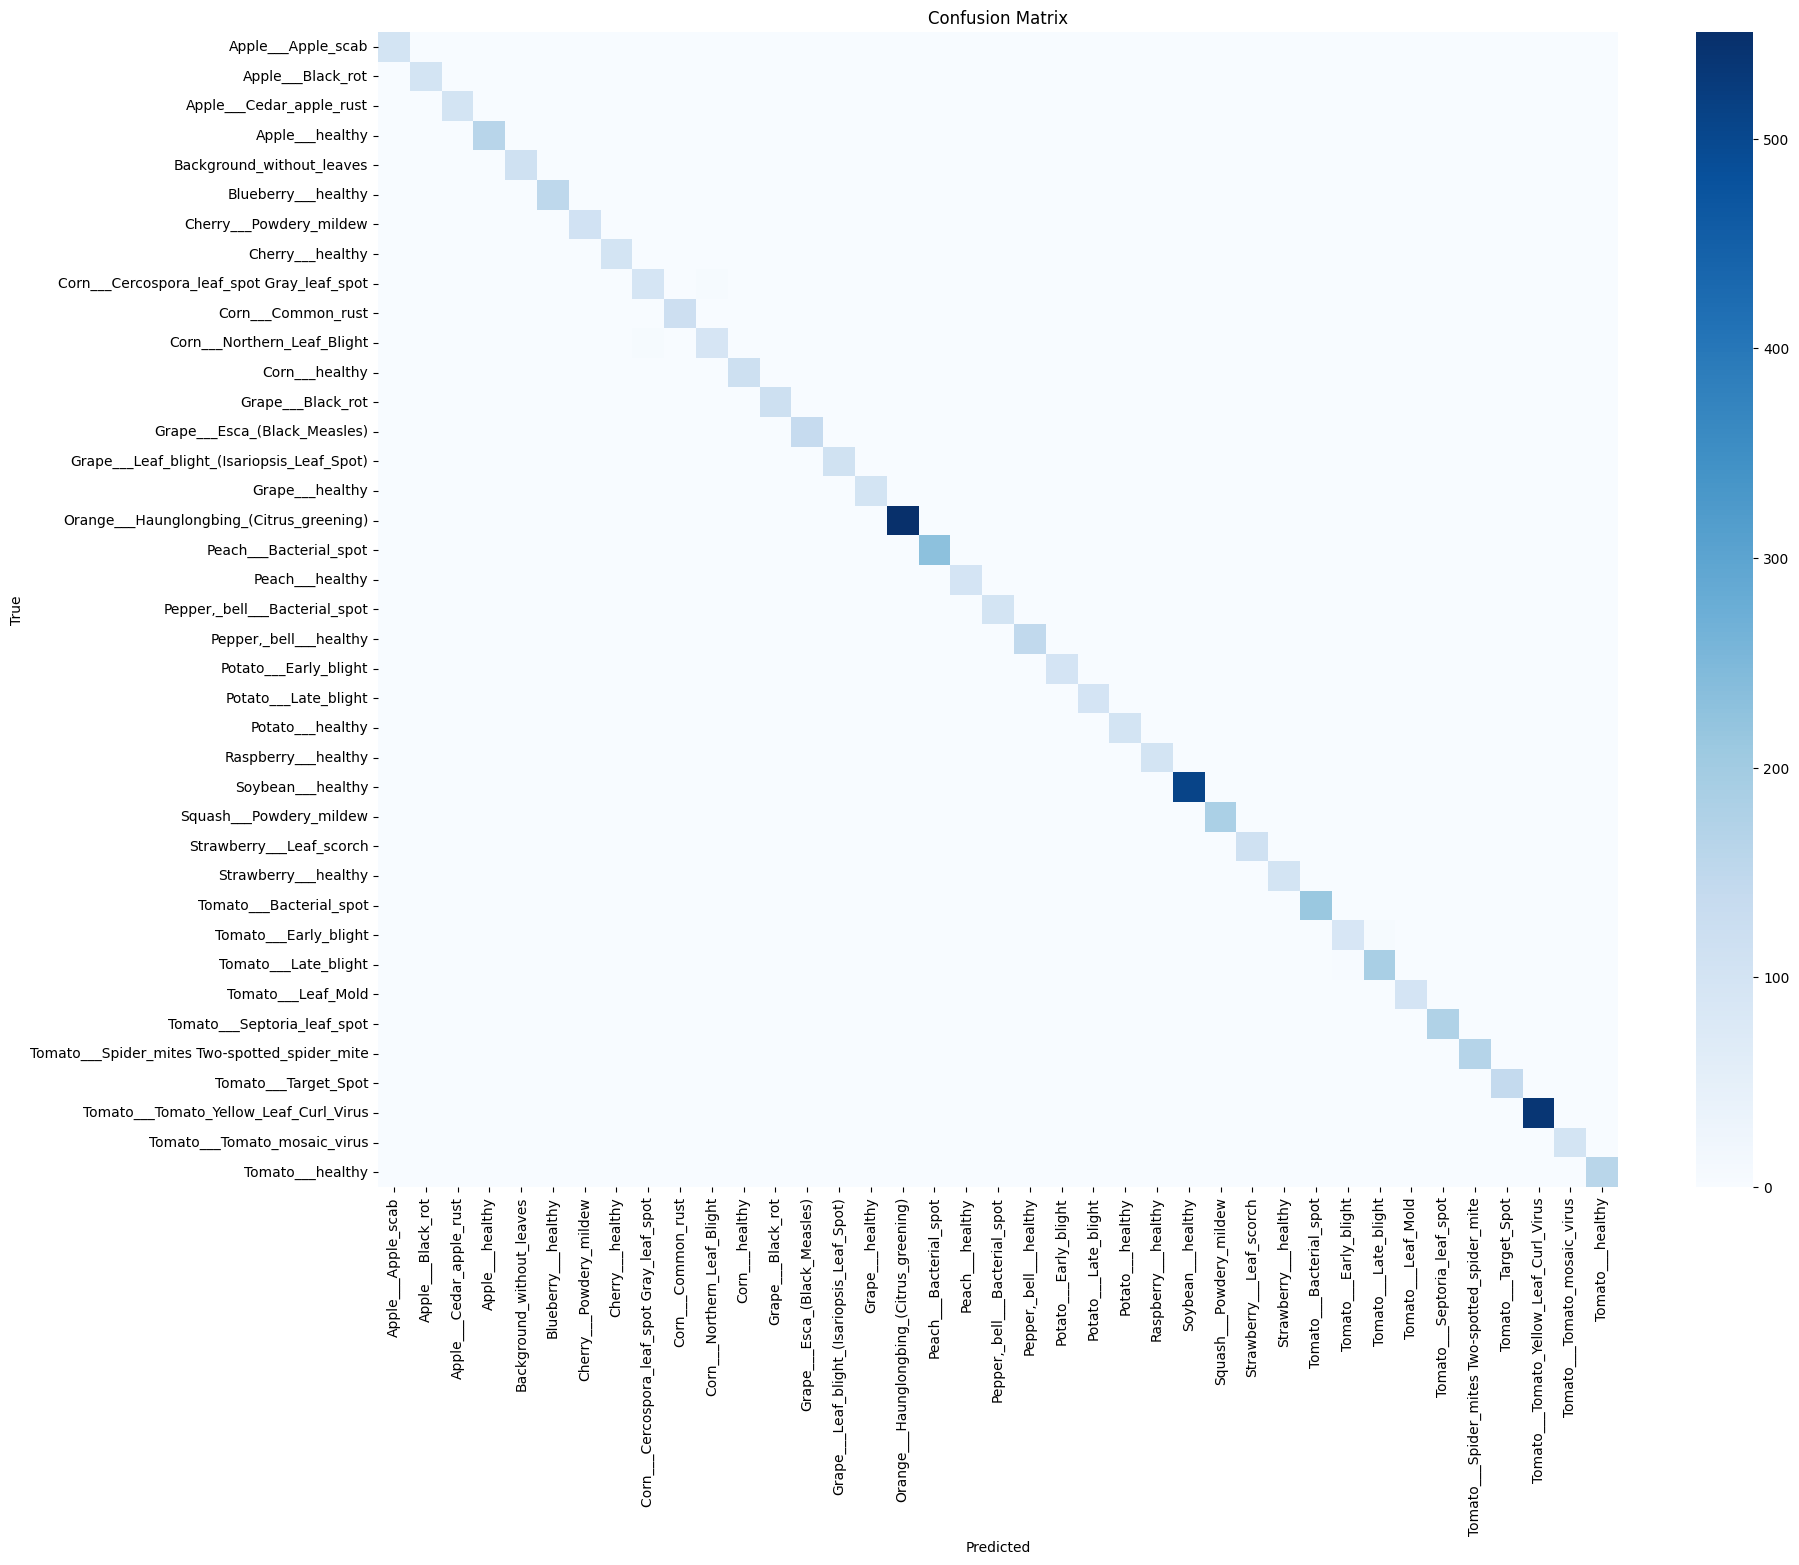

In [ ]:
import os
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_path = "/content/dataset"
possible_test_dirs = ["test", "val", "validation"]
test_dir = None

for candidate in possible_test_dirs:
    candidate_path = os.path.join(base_path, candidate)
    if os.path.exists(candidate_path):
        test_dir = candidate_path
        break

if test_dir is None:
    raise FileNotFoundError("No valid test directory found in /content/dataset")

print(f" Using test directory: {test_dir}")

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

# 🔹 Get labels & predictions
true_labels = []
pred_labels = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    true_labels.extend(labels.numpy())
    pred_labels.extend(preds)

print("\n=== Classification Report ===")
print(classification_report(true_labels, pred_labels, target_names=class_names))

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np

def safe_make_gradcam_heatmap(img_array_preprocessed, model, last_conv_layer):
    """
    Generates a Grad-CAM heatmap for a given image and model safely.
    Ensures model is built before computing gradients.
    """
    efficientnet_layer = model.get_layer("efficientnetb4")

    last_conv_layer = efficientnet_layer.get_layer("top_conv")


    if not model.built:
        _ = model(img_array_preprocessed)
    last_layer_activation = model.layers[-1].activation
    model.layers[-1].activation = None

    grad_model = tf.keras.models.Model(
        model.inputs, [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, predictions = grad_model(img_array_preprocessed)
        predicted_class_index = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class_index]

    grads = tape.gradient(loss, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    max_val = tf.math.reduce_max(heatmap)
    if max_val == 0:
        heatmap = tf.zeros_like(heatmap)
    else:
        heatmap /= max_val

    model.layers[-1].activation = last_layer_activation

    return heatmap.numpy(), predicted_class_index.numpy()


In [ ]:
!pip install -q streamlit pyngrok
from pyngrok import ngrok
ngrok.set_auth_token("30KwR5ga0Vn9OtYNtI04zeZnnVL_6MiSjKv2387sQbijjpHSS")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import os
import json
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess


MODEL_PATH = '/content/drive/MyDrive/plant_disease_recog_model_pwp.keras'
LABELS_PATH = '/content/drive/MyDrive/class_indices.json'
IMG_TARGET_SIZE = (160, 160)

st.set_page_config(page_title="Plant Disease Classifier", layout="centered")
st.title(" Automated Plant Disease Detection using EfficientNetB4")

RECOMMENDATIONS = {
    "Apple___Black_rot": (
        "Detected: **Black Rot on Apple Leaves** \n\n"
        " Cause: Caused by the fungus *Botryosphaeria obtusa*, leading to leaf spots and fruit rot.\n"
        " Suggested Action: Remove and destroy affected leaves and mummified fruits. "
        "Apply copper-based or sulfur fungicides early in the season. "
        "Ensure good air circulation by pruning dense canopies."
    ),

    "Apple___Cedar_apple_rust": (
        "Detected: **Cedar Apple Rust Infection** \n\n"
        " Cause: A fungal disease spread from nearby cedar or juniper trees.\n"
        " Suggested Action: Remove nearby cedar hosts if possible. "
        "Apply myclobutanil or propiconazole fungicides during early spring. "
        "Maintain proper spacing and monitor after rainfall."
    ),

    "Apple___Apple_scab": (
        "Detected: **Apple Scab Disease** \n\n"
        " Cause: Caused by the fungus *Venturia inaequalis*, leading to dark, velvety spots on leaves and fruits.\n"
        " Suggested Action: Use resistant apple varieties if possible. "
        "Remove fallen leaves after harvest. "
        "Apply fungicides such as captan or mancozeb during budding and early fruit stages."
    ),

    "Apple___healthy": (
        "Detected: **Healthy Apple Leaf** \n\n"
        "The leaf appears healthy and disease-free. "
        "Maintain regular irrigation, monitor for pests, and provide balanced nutrition to sustain plant health."
    ),

    "Tomato___Bacterial_spot": "Suggested Action: Apply copper-based fungicides. Use certified disease-free seeds/transplants.",
    "Potato___Late_blight": "Suggested Action: Apply preventative fungicides, especially during cool, moist weather. Ensure proper plant spacing.",
    "Background_without_leaves": "The image appears to be a background or non-leaf material. Please upload a clear leaf image."
}


@st.cache_resource(show_spinner=False)
def load_model_and_labels(model_path: str, labels_path: str):
    """Load the trained Keras model and class index mapping."""
    if not os.path.exists(model_path):
        st.error(f"Model file not found at {model_path}. Please check the path.")
        st.stop()
    if not os.path.exists(labels_path):
        st.error(f"Labels file not found at {labels_path}. Please check the path.")
        st.stop()

    model = tf.keras.models.load_model(model_path, compile=False)
    with open(labels_path, "r") as f:
        class_indices = json.load(f)
    return model, class_indices


def load_and_preprocess_image(image_file, target_size=IMG_TARGET_SIZE):
    """Load, resize, and preprocess an image for EfficientNet."""
    img = Image.open(image_file).convert("RGB")
    display_img = img.resize((400, 400))
    img = img.resize(target_size)

    img_array = np.array(img, dtype=np.float32)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = efficientnet_preprocess(img_array)

    return img_array, display_img




def predict_image_class(model, preprocessed_img_array, class_indices):
    """Predict class label and compute confidence."""

    probs = model.predict(preprocessed_img_array, verbose=0)[0]

    predicted_class_index = int(np.argmax(probs))
    predicted_class_name = class_indices.get(
        str(predicted_class_index),
        f"Unknown Class Index {predicted_class_index}"
    )

    confidence = probs[predicted_class_index] * 100
    confidence_display = np.round(confidence, 2)

    return predicted_class_name, confidence_display





load_state = st.empty()
try:
    with st.spinner("Loading EfficientNetB4 model and class indices..."):
        model, class_indices = load_model_and_labels(MODEL_PATH, LABELS_PATH)
    load_state.success(" Model loaded successfully!")
    st.info(" Softmax layer added to normalize model outputs.")

except Exception as e:
    load_state.error(f" Failed to load model or labels: {e}")
    st.stop()


st.subheader(" Upload a leaf image for disease detection")

uploaded_image = st.file_uploader(
    "Upload Image",
    type=["jpg", "jpeg", "png"],
    help="Upload a clear image of the leaf"
)

if uploaded_image is not None:
    preprocessed_img_array, display_img = load_and_preprocess_image(uploaded_image)


    st.image(display_img, caption="Uploaded Leaf Image", use_container_width=True)

    if st.button(" Classify"):
        with st.spinner("Analyzing image and predicting disease..."):
            prediction, confidence = predict_image_class(model, preprocessed_img_array, class_indices)


        st.success(f" Detected Disease: **{prediction}**")
        st.metric(label="Confidence", value=f"{confidence:.2f}%")


        recommendation = RECOMMENDATIONS.get(
            prediction,
            "No specific recommendation found. Please consult a local agricultural expert."
        )

        st.info(f"💡 **Recommendation:** {recommendation}")

else:
    st.info("Please upload a leaf image to start the prediction.")



Overwriting app.py


In [ ]:
from pyngrok import ngrok
import threading
import time
import os

ngrok.set_auth_token("30KwR5ga0Vn9OtYNtI04zeZnnVL_6MiSjKv2387sQbijjpHSS")

def run_streamlit():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run_streamlit)
thread.start()

time.sleep(5)

public_url = ngrok.connect(8501)
print(f"🚀 Streamlit app is live at: {public_url}")

🚀 Streamlit app is live at: NgrokTunnel: "https://f72b14dd8919.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/plant_disease_recog_model_pwp.keras', compile=False)
print(model.layers[-1].activation)


<function softmax at 0x7e0b2a18df80>
